# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [5]:
# I discussed some problems with Courtney Kelly.


#importing packages we'll need :)
from __future__ import print_function, division
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import linear_model
import pandas as pd
import numpy as np

%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [271]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [96]:
print(y)
print(X.describe())
X.head(10)

['rec.sport.baseball' 'rec.sport.baseball' 'rec.sport.hockey' ...,
 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey' 'rec.sport.hockey']
               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002144     0.006710     0.001454     0.002285   
std       0.030224     0.020707     0.034655     0.023100     0.021627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003945     0.003125     0.000920     0.

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.133553,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.420916,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


X is a dataframe which is a bag-of-words representation of a dataset of 2845 emails. It contains the 1000 most used words in the emails. 
<br>y is a 2845 element array of the classifications for each email in X. The classifications take on one of the following values: 
alt.atheism, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, rec.sport.baseball, rec.sport.hockey

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [273]:
kmeans = KMeans(n_clusters=5, random_state = 0).fit(X)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [274]:
print("adjusted rand score: {}".format(adjusted_rand_score(kmeans.predict(X),y)))
print("inertia: {}".format(kmeans.inertia_))
print("mean euclidian distance: {}".format(np.mean(np.linalg.norm(X-X.mean(), axis = 1))))

adjusted rand score: 0.210471735561
inertia: 2593.25497217
mean euclidian distance: 0.954581397358


The rand score (or rand index) computes how similar two custerings are by considering every pair of samples and counting pairs that are assigned in the same or different clusters. The index is 0 when the two custerings do not agree on any pairs of points and 1 when the clusters are the same. The inertia of a cluster is the sum of the distances of the samples to their assigned cluster center.

Thus, the quality seems relatively unimpressive. The adjusted rand score is barely above 20%. Had we assigned entirely randomly, we would have expected a score of 20% (because there are 5 categories) so it seems that our kmeans had little to no success. The inertia is also very large, which means the clusters are very wide.


### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [86]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
unique2, counts2 = np.unique(y, return_counts=True)

print("Num data points with each label:   \n{}".format(dict(zip(unique2, counts2))))
print("\nNum data points in each cluster:   \n{}".format(dict(zip(unique, counts))))

Num data points with each label:   
{'rec.sport.baseball': 597, 'comp.sys.mac.hardware': 578, 'rec.sport.hockey': 600, 'comp.sys.ibm.pc.hardware': 590, 'alt.atheism': 480}

Num data points in each cluster:   
{0: 1070, 1: 640, 2: 372, 3: 234, 4: 529}


The five labels in the dataset are close to evenly distributed at about 20% each (~570 points). We would expect a quality clustering with 5 means to have a similar distribution. However, our kmeans has more than a thousand points in one cluster and 234 in another. This further demonstrates the fact that our kmeans was not a good way to represent this data.

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [87]:
center_clusters = kmeans.cluster_centers_
distance_matrix = np.zeros((5,5))

def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

for i in range(0,5):
    for j in range(0,5):
        distance_matrix[i][j] = distance(center_clusters[i],center_clusters[j])
        
distance_matrix



array([[ 0.        ,  0.20521276,  0.21962632,  0.32808289,  0.1981416 ],
       [ 0.20521276,  0.        ,  0.27867391,  0.39786636,  0.29860566],
       [ 0.21962632,  0.27867391,  0.        ,  0.39341786,  0.28997749],
       [ 0.32808289,  0.39786636,  0.39341786,  0.        ,  0.32314094],
       [ 0.1981416 ,  0.29860566,  0.28997749,  0.32314094,  0.        ]])

### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

<function matplotlib.pyplot.show>

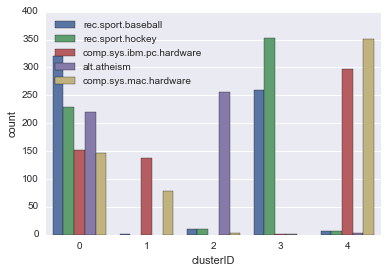

In [107]:
fig, ax = plt.subplots()
ax = sns.countplot(x=kmeans.labels_, hue=y)
plt.xlabel('clusterID')
plt.show

Ideally, we would want only one large bar in each cluster. Only cluster 2 does this, and seems to capture alt.atheism pretty correctly (although it has false negatives which are picked up by cluster 0). Clusters 1,3,4 do seem to somewhat suitably capture exactly two labels. That is to say, items in clusters 1,3,4 can be safely narrowed down to 1 of 2 labels. Interestingly, clusters 1 and 4 capture the same 2 labels! Cluster 0 is just a mixed bag of every label.

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

1 Components: 
adjusted rand score: 0.210101502256
inertia: 2.82199065984

2 Components: 
adjusted rand score: 0.268194567638
inertia: 10.59329323

3 Components: 
adjusted rand score: 0.238732152267
inertia: 20.4233010148

5 Components: 
adjusted rand score: 0.223425585583
inertia: 49.8679237709

10 Components: 
adjusted rand score: 0.217701953337
inertia: 118.179759499

20 Components: 
adjusted rand score: 0.206239296724
inertia: 231.926428725

50 Components: 
adjusted rand score: 0.214539950219
inertia: 492.330450662

100 Components: 
adjusted rand score: 0.211852614456
inertia: 820.117001173

500 Components: 
adjusted rand score: 0.21748257219
inertia: 2143.57174637

1000 Components: 
adjusted rand score: 0.223768003003
inertia: 2593.11855494



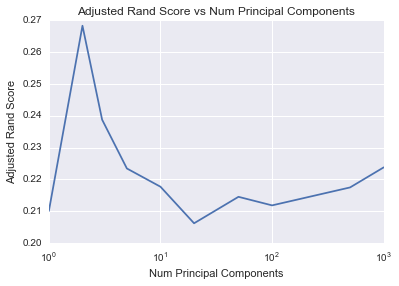

In [222]:
components = [1,2,3,5,10,20,50,100,500,1000]
rscores = np.zeros(10)
for i in range(len(n_components)):
    X_copy = X.copy(deep = True)
    print("{} Components: ".format(components[i]))
    X_copy = PCA(n_components = components[i]).fit_transform(X_copy)
    kmeans.fit_transform(X_copy)
    rscores[i] = adjusted_rand_score(kmeans.predict(X_copy),y)
    print("adjusted rand score: {}".format(adjusted_rand_score(kmeans.labels_,y)))
    print("inertia: {}\n".format(kmeans.inertia_))
    
plt.figure()
plt.semilogx(components,rscores, basex=10)
plt.title('Adjusted Rand Score vs Num Principal Components')
plt.xlabel('Num Principal Components')
plt.ylabel('Adjusted Rand Score')


This graph shows that reducing to a very low number of dimensions leads to a spike in adjusted rand score! 2 principal component dimensions was best and lead to a rand score of just below 0.27 which is still pretty dismal.

As evident from the print statements, inertia grows as the number of dimensions grows. This makes sense because inertia is a measure of distance. Thus, rand score is a better way to assess if pca is helping with kmeans.

Dimensionality reduction, specifically PCA, helps us ignore outliers on insignificant dimensions. These outliers are projected onto the principal dimensions and thus are much easier to cluster. Thus, the means are more representative of relevant dimensions and can accurately reflect important elements of the data.

### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

adjusted rand score: 0.268194567638/n
value counts of labels
2    967
0    754
1    620
4    296
3    208
dtype: int64


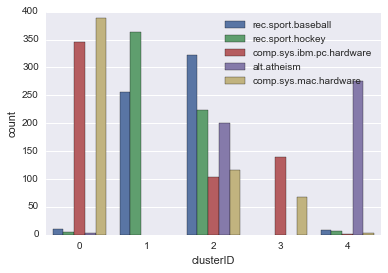

In [226]:
X_copy = X.copy(deep = True)
X_2d = PCA(n_components = 2).fit_transform(X_copy)
kmeans_pca = KMeans(n_clusters=5, random_state = 0).fit(X_2d)
print("adjusted rand score: {}/n".format(adjusted_rand_score(kmeans_pca.labels_,y)))


fig, ax = plt.subplots()
ax = sns.countplot(x=kmeans_pca.labels_, hue=y)
plt.xlabel('clusterID')
plt.show

print('value counts of labels')
print(pd.value_counts(kmeans_pca.labels_))

These clusters seem very slightly better. The mixed-bag cluster, in this case cluster2, has less data points, which is a good sign and some of the more clean cut clusters such as cluster0 have more datapoints. This makes sense because the rand score only went up to .27.

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [258]:
labels_interp = []

for j in range(len(kmeans_pca.labels_)):
    i = kmeans_pca.labels_[j]
    if i==0:
        labels_interp.append("comp.sys.mac.hardware")
    if i==1:
        labels_interp.append("rec.sport.hockey")
    if i==2:
        labels_interp.append("rec.sport.baseball")
    if i==3:
        labels_interp.append("comp.sys.ibm.pc.hardware")
    if i==4:
        labels_interp.append("alt.atheism")

### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

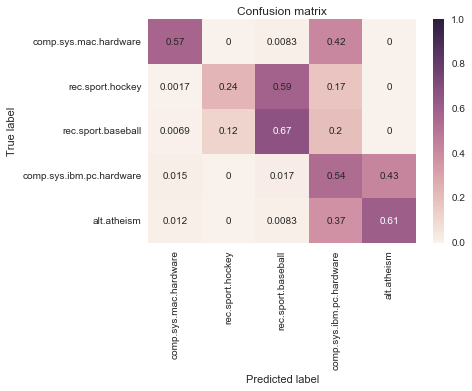

In [275]:
#from lab 2
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    plt.figure()
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cm = confusion_matrix(y,labels_interp) #create cm
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis] #normalize cm

cats = ['comp.sys.mac.hardware','rec.sport.hockey','rec.sport.baseball','comp.sys.ibm.pc.hardware', 'alt.atheism']

plot_confusion_matrix(cm_norm,classes=cats) #use function to plot cm

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

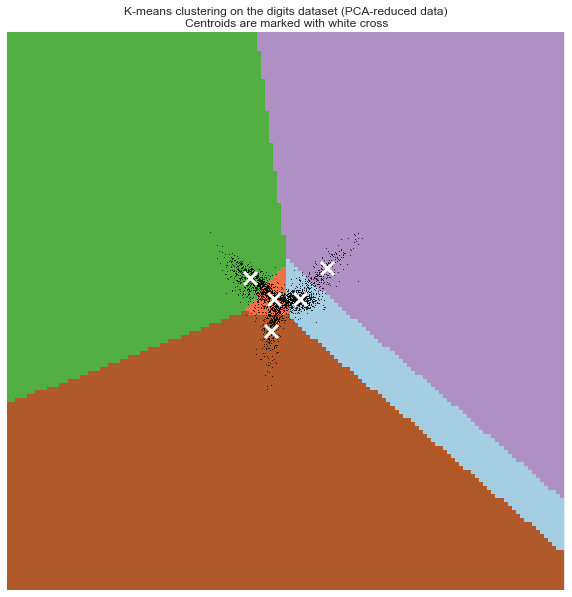

In [266]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

fig,ax = plt.subplots(figsize=(10,10))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.1 do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

Kmeans is *not* deterministic because it could converge to a local minimum depending on the initial guesses for the cluster centers. Different starting points lead to different results!

Yes, it did run multiple initialisations! The initial values were selected using the k-means++ algorithm and then a standard k-means clustering algorithm was run on the data to generate the 5 final clusters.

The old algorithm was Lloyd's algorithm. Two problems with this algorithm were that it often led to very poor 'optimal' clusterings due to local minima and had potential to have very long runtime.




## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [19]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [72]:
print('Digits Keys: {}\n'.format(digits.keys()))
data = pd.DataFrame(digits.data)
data.describe()

Digits Keys: ['images', 'data', 'target_names', 'DESCR', 'target']



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [70]:

space = " "
space2 = ""

for i in range(64):
    if i >= 10:
        space = ""
        
    max = data.max(axis=0)[i]
    if max < 10:
        space2 = " "
    else:
        space2 = ""
    print('dim: {}    {}max: {}{}       min: {}      std: {}'
          .format(i,space,max,space2, data.min(axis=0)[i], data.std(axis=0)[i]))


data.std(axis=0)


Digits Keys: ['images', 'data', 'target_names', 'DESCR', 'target']

dim: 0     max: 0.0        min: 0.0      std: 0.0
dim: 1     max: 8.0        min: 0.0      std: 0.907192095251
dim: 2     max: 16.0       min: 0.0      std: 4.75482633966
dim: 3     max: 16.0       min: 0.0      std: 4.24884184826
dim: 4     max: 16.0       min: 0.0      std: 4.28738800697
dim: 5     max: 16.0       min: 0.0      std: 5.66641772745
dim: 6     max: 16.0       min: 0.0      std: 3.32577518607
dim: 7     max: 15.0       min: 0.0      std: 1.03738285703
dim: 8     max: 2.0        min: 0.0      std: 0.0942215548081
dim: 9     max: 16.0       min: 0.0      std: 3.19616040751
dim: 10    max: 16.0       min: 0.0      std: 5.4214556259
dim: 11    max: 16.0       min: 0.0      std: 3.97754262188
dim: 12    max: 16.0       min: 0.0      std: 4.78268057015
dim: 13    max: 16.0       min: 0.0      std: 6.05296002571
dim: 14    max: 16.0       min: 0.0      std: 3.58632093597
dim: 15    max: 12.0       min: 0.0     

0     0.000000
1     0.907192
2     4.754826
3     4.248842
4     4.287388
5     5.666418
6     3.325775
7     1.037383
8     0.094222
9     3.196160
10    5.421456
11    3.977543
12    4.782681
13    6.052960
14    3.586321
15    0.827915
16    0.062368
17    3.576301
18    5.690767
19    5.802662
20    6.175729
21    6.197322
22    3.259870
23    0.438597
24    0.033352
25    3.146532
26    6.192038
27    5.882936
28    6.152093
29    5.872556
        ...   
34    6.324687
35    6.268391
36    5.933490
37    5.870648
38    3.537283
39    0.000000
40    0.145185
41    2.981816
42    6.537955
43    6.441378
44    6.259511
45    5.695527
46    4.330951
47    0.307356
48    0.204223
49    1.746153
50    5.644496
51    5.226948
52    5.302048
53    6.031154
54    4.919406
55    0.984401
56    0.023590
57    0.934302
58    5.103019
59    4.374694
60    4.933947
61    5.900623
62    4.090548
63    1.860122
dtype: float64

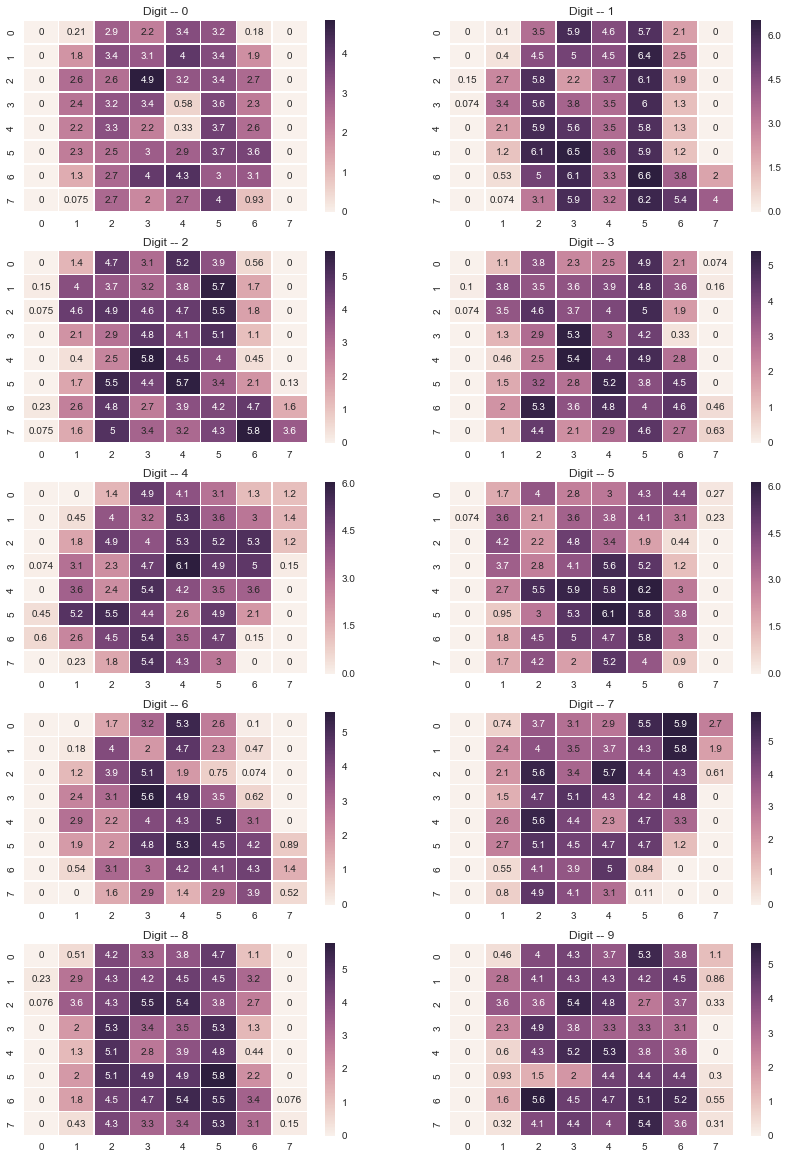

In [71]:
'''
reshaped_images = np.zeros(((1797,8,8)))
for j in range(1797):
    reshaped_images[j,:,:] = np.zeros([8,8])
    #reshaped_images[j,:,:] = data[j](axis=1).reshape((8,8))
    type(data[j])

Extract the standard deviations from the output of the describe method 
(just another DataFrame with 'std' as one of the index values), 

reshape to an 8x8 image, 
and plot a heatmap (use sns.heatmap()) to show you which dimensions vary the most. 
For a bonus mark, produce a plot like this for each digit. Hint: you can use .groupby(digits.target) 
before calling .describe().

Use sns.heatmap() to plot the first 9 digits in the dataset 
'''

digit_stds = data.groupby(digits.target).std().as_matrix()

x = [np.zeros([8,8]) for _ in range(10)]
numbers = np.dstack(x)
numbers = np.rollaxis(numbers,-1)

#reshape data into 8x8
for i in range(10):
    numbers[i] = digit_stds[i].reshape((8,8))

#create figures
fig,axn = plt.subplots(5, 2, figsize=(14,20))

#print heatmaps
for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Digit -- {}".format(i))

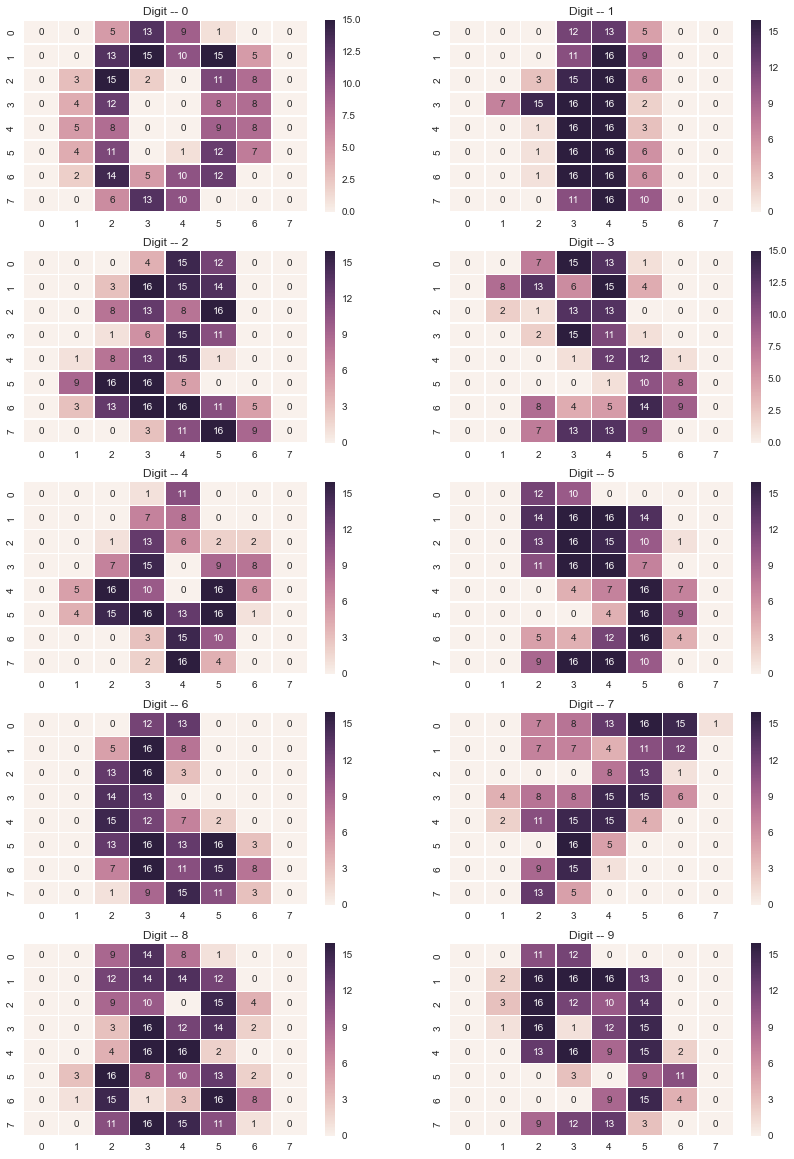

In [69]:
x = [np.zeros([8,8]) for _ in range(10)]
numbers = np.dstack(x)
numbers = np.rollaxis(numbers,-1)

#reshape data into 8x8
for i in range(10):
    numbers[i] = data.iloc[i].reshape((8,8))
    
#create figures
fig,axn = plt.subplots(5, 2, figsize=(14,20))

#print heatmaps
for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Digit -- {}".format(i))

No! Some dimensions have a standard deviation of zero.. Thus they are completely worthless from a machine learning standpoint. Others are more promising however!

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

Number of Principal Components That Maintain 95% of Variance: 28


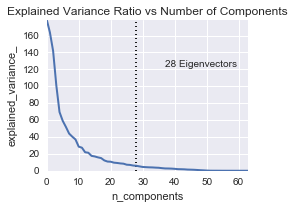

In [74]:
pca = PCA(n_components = digits.data.shape[1])
X_digits = digits.data
y_digits = digits.target
pca.fit(X_digits)

total_variance = sum(pca.explained_variance_)
cumulative_explained_variance = 0.0
for i in range(len(pca.explained_variance_)):
    cumulative_explained_variance += pca.explained_variance_[i]
    if cumulative_explained_variance / total_variance > .95:
        break;
print("Number of Principal Components That Maintain 95% of Variance: {}".format(i))
        

#plot
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.vlines(i, ymin = 0, ymax = 1000, linestyles='dotted')
plt.annotate("28 Eigenvectors", xy=(28, 100), xycoords='data', xytext=(29, 20), textcoords='offset points')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

We were able to explain 95% of the variance with only 28 principal eigen-directions. This is amazing. It means we can essentially delete half the data while preserving almost all of the structure!

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

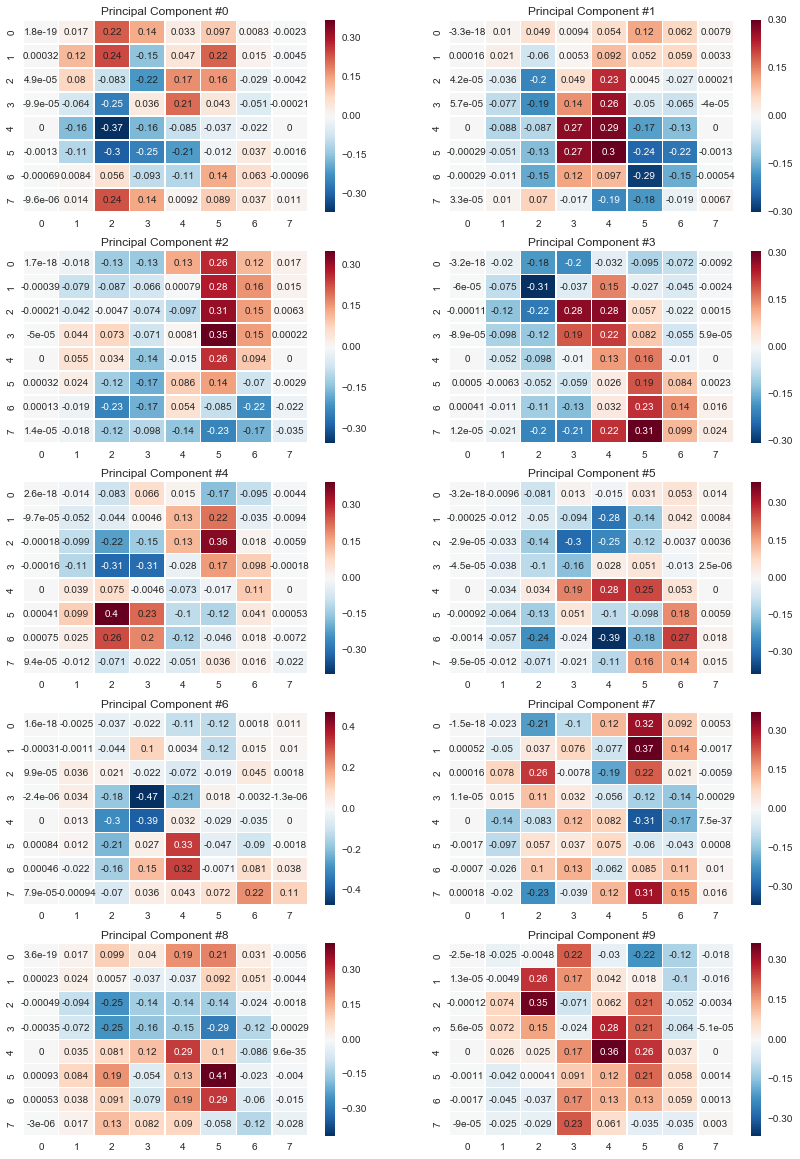

In [77]:
x = [np.zeros([8,8]) for _ in range(10)]
numbers = np.dstack(x)
numbers = np.rollaxis(numbers,-1)

for i in range(10):
    numbers[i] = pca.components_[i].reshape((8,8))

fig,axn = plt.subplots(5, 2, figsize=(14,20))

for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Principal Component #{}".format(i))

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

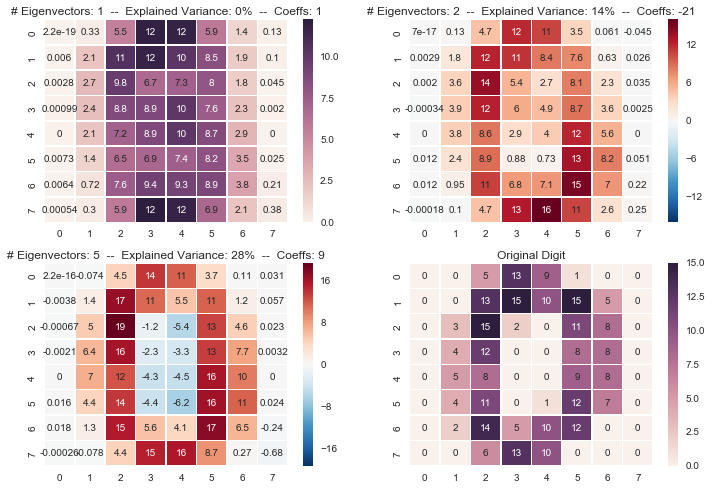

In [106]:
multipliers = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
x = [np.zeros([8,8]) for _ in range(10)]
numbers = np.dstack(x)
numbers = np.rollaxis(numbers,-1)

nums = [1,2,5]

for i in nums:
    new = pca.mean_
    for j in range(i):
        new += pca.components_[j] * multipliers[j]
    numbers[i] = new.reshape((8,8))

numbers[3] = data.iloc[0].reshape((8,8))
fig,axn = plt.subplots(2, 2, figsize=(12,8))

for ax,i in zip(axn.flat, range(4)):
    if i < 3:
        percent_var = sum(pca.explained_variance_[0:i])/sum(pca.explained_variance_)
        sns.heatmap(numbers[nums[i]], ax=ax, annot=True, linewidths=.5)
        ax.set_title("# Eigenvectors: {}  --  Explained Variance: {}%  --  Coeffs: {}".format
                     ( nums[i], int(100*percent_var), int(multipliers[i]) ))
    
    else:
        sns.heatmap(numbers[i], ax=ax, annot=True, linewidths=.5)
        ax.set_title("Original Digit")



Yes! The eigenvector recreations DO create realistic representations of the data. That is remarkable!

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [105]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

y = digits.target
X = digits.data
X_pca = pca.fit_transform(X_digits)

gnb_scores = []
gnb_pca_scores = []
svc_scores = []
svc_pca_scores = []

kf = KFold(X.shape[0], n_folds=5, random_state=0)

for train, test in kf:
    train_X = X[train, :]; train_y = y[train] # split training set
    test_X = X[test, :]; test_y = y[test] # split test set
    
    train_X_pca = X_pca[train, :] 
    test_X_pca = X_pca[test, :]
    
    svc = SVC(kernel='linear', random_state = 0)
    svc_pca = SVC(kernel='linear', random_state = 0)

    
    gnb = GaussianNB()
    gnb_pca = GaussianNB()

    
    #fit models
    gnb.fit(train_X, train_y)
    gnb_pca.fit(train_X_pca, train_y)
    svc.fit(train_X, train_y)
    svc_pca.fit(train_X_pca, train_y)
    
    #score models
    gnb_scores.append(gnb.score(test_X, test_y))
    gnb_pca_scores.append(gnb_pca.score(test_X, test_y))
    svc_scores.append(svc.score(test_X, test_y))
    svc_pca_scores.append(svc_pca.score(test_X, test_y))
    
#print scores
print('Classification accuracy SVC without PCA: {:.6f}'.format(np.average(svc_scores)))
print('Classification accuracy SVC with PCA: {:.6f}\n'.format(np.average(svc_pca_score)))
print('Classification accuracy GNB Classifier without PCA: {:.6f}'.format(np.average(gnb_score)))
print('Classification accuracy GNB Classifier with PCA: {:.6f}\n'.format(np.average(gnb_pca_score)))




Classification accuracy SVC without PCA: 0.948810
Classification accuracy SVC with PCA: 0.930362

Classification accuracy GNB Classifier without PCA: 0.813370
Classification accuracy GNB Classifier with PCA: 0.813370



Unfortunately, I did not see an increase in one classifier and the other staying the same. However, if I did, I might expect the Support Vector classifier to stay the same while the GNB classifier might improve. This is because the Support Vector classifier is already a sparse solution so reducing dimensionality does not really help. However, Guassian Naive Bayes relies heavily on mapping each dimension to a distribution so using the dimensions with the greatest variance would be very useful in GNB classification. I would imagine that if we were to reduce the dimension, which we didn't because our PCA was 64 components, it would also greatly speed up GNB processing time.